# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów lub badanej cechy powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów lub badanej cechy w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autora rozwiązania (`NAME` - imię, nazwisko i numer indeksu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [ ]:
NAME = ""

---

## Kolokwium zaliczeniowe (1 termin, zestaw 1)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import libpysal as ps
import pointpats as pp

import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru (11 pkt)

Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru zgodnie ze schematem omawianym podczas ćwiczeń oraz opisem podanym w docstring funkcji.

Następnie wykorzystaj przygotowaną funkcję do wygenerowania rozkładu punktów o podanych niżej parametrach i przedstaw go w postaci wykresu punktowego.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 35
 - wartość współczynnika określającego siłę komponentu losowego: 0.65
 - zakres wartości współrzędnej x: [-15, 5]
 - zakres wartości współrzędnej y: [-20, 15]

#### a) Przygotowanie funkcji

In [37]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w poziomie i w pionie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    dx = (x_lim[-1]-x_lim[0])/grid[-1]
    dy = (y_lim[-1]-y_lim[0])/grid[0]
    x=[]
    y=[]
    for i in range(grid[0]):
        for j in range(grid[-1]):
            x.append(dx/2+j*dx+random_component*(np.random.random_sample()*dx-dx/2))
            y.append(dy/2+i*dy+random_component*(np.random.random_sample()*dy-dy/2))
    d={"X":x,"Y":y}
    df=pd.DataFrame(data=d)
    return df

#### b) Wygenerowanie i wizualicacja procesu

Text(0, 0.5, 'y')

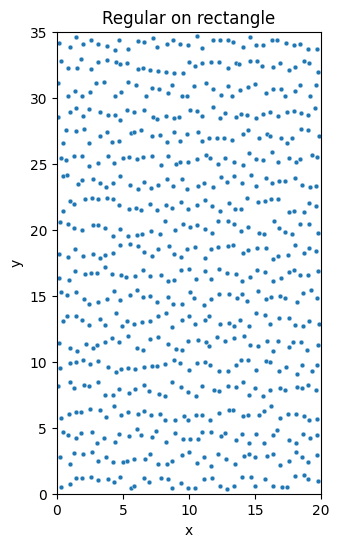

In [38]:
# YOUR CODE HERE
result=regular_on_rectangle([20,35],0.65,[-15,5],[-20,15])

fix,ax=plt.subplots(1,1,figsize=(12,6))
plt.grid(False)
sns.scatterplot(data=result,x="X",y="Y",ax=ax, s = 12)
plt.title("Regular on rectangle")
ax.axis("square")
ax.set_xlim([0,20])
ax.set_ylim([0,35])
ax.set_xlabel("x")
ax.set_ylabel("y")

### Zadanie 2: Test Kołmogorowa - Smirnowa (11 pkt)

Przygotuj funkcję `kolmogorow_smirnow_test()`, która będzie przeprowadzać test istotności Kołmogorowa-Smirnowa i wyświetlać jego wynik zgodnie ze schematem omawianym podczas ćwiczeń oraz opisem podanym w docstring funkcji.

Następnie wykorzystaj przygotowaną funkcję do sprawdzenia, czy rozkład punktowy zaimportowany z pliku points_1.csv jest jednorodnym rozkładem Poissona. W obliczeniach przyjmij poziom istotności $\alpha=0.02$.

UWAGA! Test należy przeprowadzić niezależnie dla współrzędnej X i Y.

Schemat wyświetlania wyników przez funkcję `kolmogorow_smirnow_test()`: <br/>
<br/>
`Test Kołmogorowa-Smirnowa dla współrzędnej X` <br/>
`H0: Testowana zmienna ma przyjęty rozkład teoretyczny` <br/>
`H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego` <br/>
`lambda = 2.036  lambda_alpha = 1.255`<br/>
`lambda >= lambda_alpha` <br/>
`Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05` <br/>
<br/>
`Test Kołmogorowa-Smirnowa dla współrzędnej Y` <br/>
`H0: Testowana zmienna ma przyjęty rozkład teoretyczny` <br/>
`H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego` <br/>
`lambda = 1.136  lambda_alpha = 1.748` <br/>
`lambda < D_alpha` <br/>
`Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.05`

#### a) Przygotowanie funkcji

In [11]:
def kolmogorow_smirnow_test(tested_points, theoretical_points, alpha):
    """
    Parameters
    -------
    tested_points: DataFrame
        Tablica zawierająca kolumnę ze współrzędnymi punktów testowanego rozkładu opisaną jako "X" lub "Y".

    theoretical_points: DataFrame
        Tablica zawierająca kolumnę ze współrzędnymi punktów toeretycznego rozkładu opisaną jako "X" lub "Y".
    
    alpha: float
        Wartość z zakresu [0,1] określająca poziom istotności.
    """
    # YOUR CODE HERE
    print(f"Test Kołmogorowa-Smirnowa dla współrzędnej {tested_points.name}")
    print("H0: Testowana zmienna ma przyjęty rozkład teoretyczny")
    print("H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego")
    Ft = np.arange(1, len(tested_points)+1)/float(len(tested_points))
    Fo = sp.stats.uniform.cdf(theoretical_points, loc = min(theoretical_points), scale = max(theoretical_points) - min(theoretical_points) )
    D = max(abs(Ft-Fo))
    lambd = D*np.sqrt(len(tested_points))
    lamdalpha = sp.stats.ksone.ppf(1-alpha, len(tested_points)-ddof-1)*np.sqrt(len(tested_points))
    print(f"lambda = {np.round(lambd,3)}  lambda_alpha = {np.round(lamdalpha,3)}")
    if lambd >= lamdalpha:
        print("lambda >= lambda_alpha")
        print(f"Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = {alpha}\n\n")
    else:
        print("lambda < D_alpha")
        print(f"Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = {alpha}\n\n")
        
    

#### b) Weryfikacja hipotezy o rozkładzie

In [13]:
# YOUR CODE HERE
alpha = 0.02
points_1 = pd.read_csv("points_1.csv")
kolmogorow_smirnow_test(points_1["X"], sorted(points_1["X"]), alpha)
kolmogorow_smirnow_test(points_1["Y"], sorted(points_1["Y"]), alpha)

Test Kołmogorowa-Smirnowa dla współrzędnej X
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
lambda = 0.755  lambda_alpha = 1.397
lambda < D_alpha
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.02


Test Kołmogorowa-Smirnowa dla współrzędnej Y
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
lambda = 2.053  lambda_alpha = 1.397
lambda >= lambda_alpha
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.02




### Zadanie 3: Wykres Fry (8 pkt)

Przygotuj funkcję `fry_plot_data()`, która będzie generować dane niezbędne do wykonania wykresu Fry zgodnie ze schematem omawianym podczas ćwiczeń oraz opisem podanym w docstring funkcji.

Następnie wykorzystaj przygotowaną funkcję do analizy rozkładu punktów zawartego w pliku points_2.csv. 

Przedstaw wyniki analizy graficznie w postaci wykresu Fry zestawionego z rozkładem punktów na podstawie którego został wykonany. Zestaw wyniki na pojedynczej figurze (siatka wykresów 1x2).

UWAGA! Parametry wykresu Fry powinny zostać ustawione w taki sposób, aby wyraźnie widoczny był charakter analizowanego rozkładu punktów.

#### a) Przygotowanie funkcji

In [14]:
def fry_plot_data(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    fry_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """    
    # YOUR CODE HERE
    df = pd.DataFrame()
    for index, row in points.iterrows():
        newPoints = points.drop([index])
        df = pd.concat([df,newPoints - row], ignore_index = True)
    return df

#### b) Wygenerowanie i wizualizacja danych 

Text(0, 0.5, 'Y')

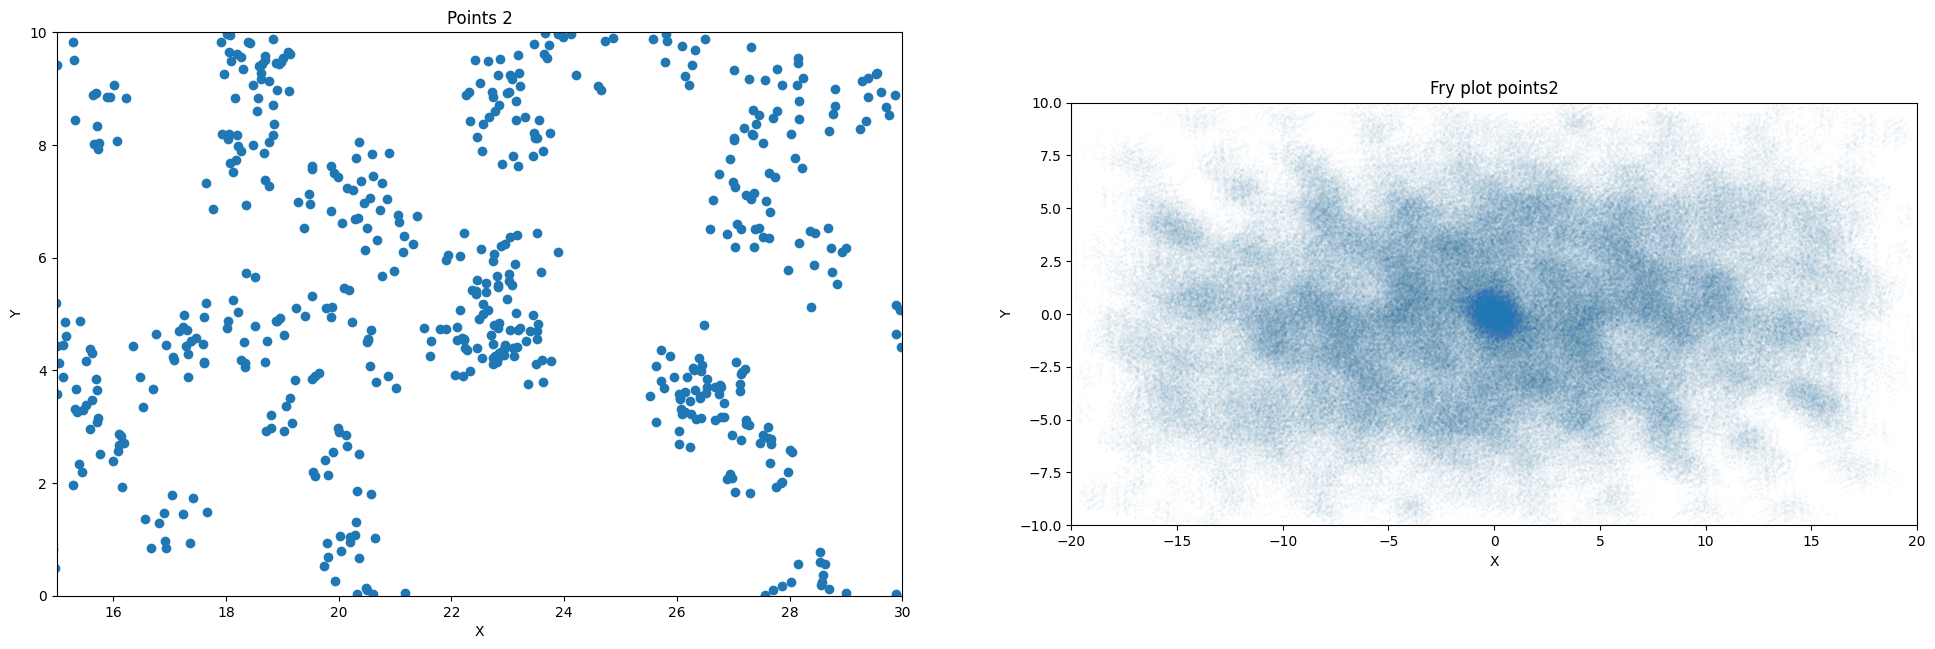

In [25]:
# YOUR CODE HERE
points_2 = pd.read_csv("points_2.csv")
resultp2 = fry_plot_data(points_2)
fig,ax=plt.subplots(1,2,figsize=(24,12))
ax[0].grid(False)
ax[0].scatter(points_2["X"],points_2["Y"])
ax[0].set_title("Points 2")
ax[0].axis("square")
ax[0].set_xlim([15,30])
ax[0].set_ylim([0,10])
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")

ax[1].grid(False)
ax[1].scatter(resultp2["X"],resultp2["Y"], alpha = 0.05, s = 0.1)
ax[1].set_title("Fry plot points2")
ax[1].axis("square")
ax[1].set_xlim([-20,20])
ax[1].set_ylim([-10,10])
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")

### Zadanie 4: Analiza danych przestrzennych z wykorzystaniem pakietu GeoPandas (20 pkt)

Zaimportuj do notatnika dane z plików Miejscowości.zip i Wojewodztwa.zip, a następnie wykonaj następujące polecenia:

1) Przygotuj funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie podobszarów. Następnie wykorzystaj przygotowane funkcje do zbadania intensywności urbanizacji na obszarze poszczególnych województw (liczba miast przypadająca na km^2 województwa).
2) Odpowiedz na pytanie ile miast leży w obrębie lub nie dalej niż 30 km od granic województwa łódzkiego. 
3) Zwizualizuj wyniki analizy na pojedynczej figurze (siatka wykresów 1x2) zgodnie z podanymi niżej wytycznymi.

Wizualizacja wyników 1 polecenia powinna zawierać:
- kartogram intesywności z nałożonym na niego analizowanym rozkładem punktów.

Wizualizacja wyników 2 polecenia powinna zawierać:
- województwa, wypełnione jednolitym kolorem,
- miasta, w jednym z dwóch wybranych kolorów w zależności od spełnienia warunku,
- oznaczenie obszaru na którym następuje spełnienie warunku.

UWAGA! Polecenia należy wykonywać na danych zapisanych w odwzorowaniu kartograficznym epsg:2180.

#### a) Przygotowanie funkcji

In [21]:
def intensity_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    counts: Series
        Seria Pandas zawierająca intensywność przypisaną do każdego z podobszarów.
    """
    # YOUR CODE HERE
    counts = {}
    for index, row in subregions.iterrows():
        counts[index] = sum(points.within(row.geometry))
    counts = pd.Series(data=counts, index = subregions.index)
    for index, row in subregions.iterrows():
        counts.loc[[index]] /= row.geometry.area
    return counts

#### b) Obliczenia i wizualizacja wyników

113


Text(808.4608585858584, 0.5, 'Y')

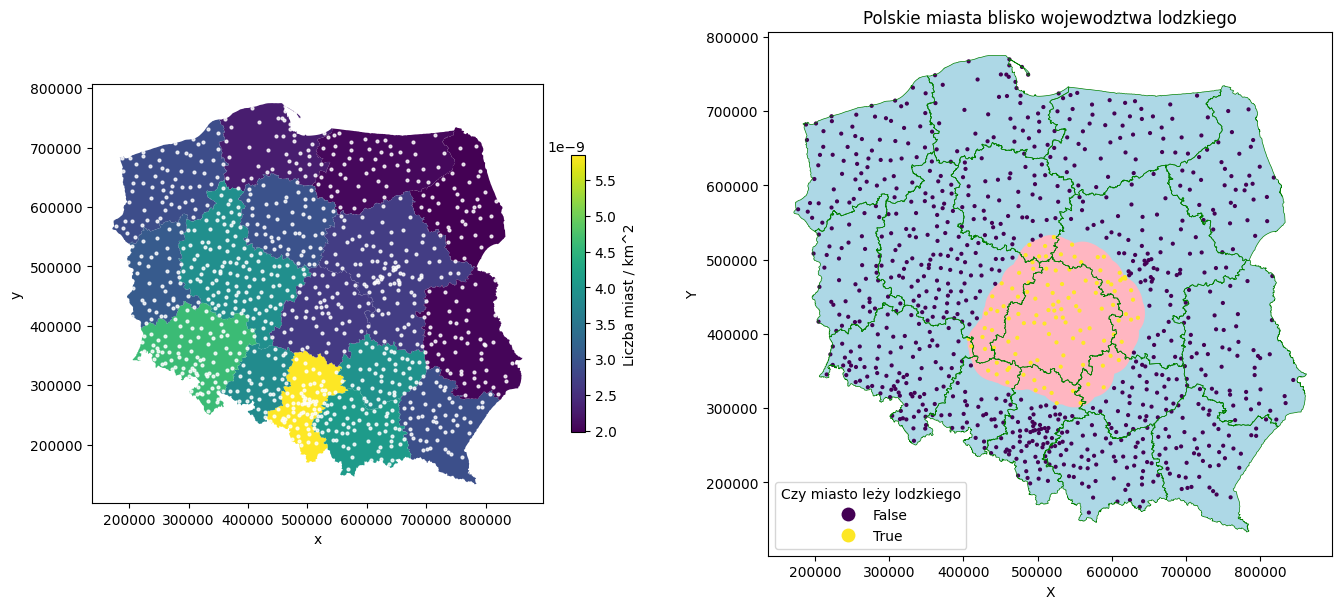

In [44]:
# YOUR CODE HERE
df_woj=gpd.read_file("Wojewodztwa.zip")
tab_woj=gpd.GeoDataFrame({'Nazwa':df_woj["JPT_NAZWA_"],'geometry':df_woj["geometry"]})

df_miej=gpd.read_file("Miejscowosci.zip")
miasta=df_miej[df_miej["rodzaj"]=='miasto']
tab_miast=gpd.GeoDataFrame({"Nazwa":miasta["nazwaGlown"],"geometry":miasta["geometry"]})

if tab_woj.crs!="epsg:2180":
    tab_woj = tab_woj.to_crs(2180)
if tab_miast.crs!="epsg:2180":
    tab_miast = tab_miej.to_crs(2180)
    

obszar = tab_woj[tab_woj['Nazwa']=='łódzkie'].buffer(30000)
df = obszar
for i in range(len(tab_miast)-1):
    df = pd.concat([df,obszar])
tab_miast['Blisko lodzkiego']=tab_miast.within(df, align = False)
ile = len(tab_miast[tab_miast['Blisko lodzkiego']])
print(ile)   

res = intensity_on_subregions(tab_miast, tab_woj)
tab_woj["Punkty"] = res

fig,ax=plt.subplots(1,2,figsize=(16,18))
tab_woj.plot(ax = ax[0], cmap = 'viridis', column = tab_woj.Punkty, legend=True,
                        legend_kwds={'label': "Liczba miast / km^2", 'shrink' : 0.2})
tab_miast.plot(ax=ax[0], color='white', markersize=4, alpha = 0.8)
ax[0].set_title("")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

tab_woj.plot(ax = ax[1], color='lightblue')
obszar.plot(color='lightpink', ax=ax[1])
tab_woj.boundary.plot(color='green', ax=ax[1], linewidth=0.5)
tab_miast.plot(ax=ax[1], cmap='viridis', column = tab_miast['Blisko lodzkiego'], markersize=4, legend=True,
                        legend_kwds={'title': "Czy miasto leży lodzkiego"})
ax[1].set_title('Polskie miasta blisko wojewodztwa lodzkiego')
ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")
